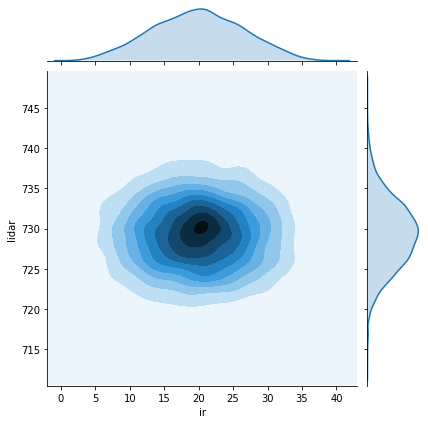

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_700.txt", delimiter=" ",
                  header=None, names=("date", "time", "ir", "lidar"))
#d = data
d = data[(data["time"] < 160000) & (data["time"] >= 120000)] # 12時から16時までのデータだけ抽出
d = d.loc[:, ["ir", "lidar"]]

sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [4]:
print("光センサの計測値の分散", d.ir.var())
print("LIDARの計測値の分散", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散:", sum(a)/(len(d)-1))

d.mean()

光センサの計測値の分散 42.117126367701594
LIDARの計測値の分散 17.702026469211457
共分散: -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [7]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [11]:
d.mean().values.T

array([ 19.86024691, 729.31195767])

In [12]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

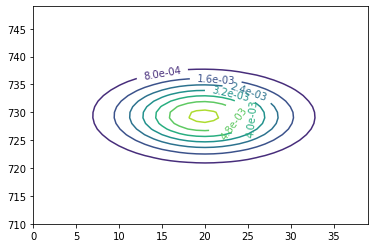

In [14]:
import numpy as np

x, y = np.mgrid[0:40, 710:750]  # 2次元平面に均等にX座標，Y座標を作る
pos = np.empty(x.shape + (2,))  # xは40x40の2次元リストで，これに３次元目を加えて40x40x2のリストを作成
pos[:,:,0] = x  # 加えた３次元目にx,yを代入
pos[:,:,1] = y
cont = plt.contour(x, y, irlidar.pdf(pos))  # x,y座標と，それに対応する密度を算出
cont.clabel(fmt="%1.1e")  # 投稿線に値を書き込むためのフォーマット提案

plt.show()

In [15]:
print("X座標: ", x)
print("Y座標: ", y)

X座標:  [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [37 37 37 ... 37 37 37]
 [38 38 38 ... 38 38 38]
 [39 39 39 ... 39 39 39]]
Y座標:  [[710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 ...
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]]


In [17]:
print(pos)
irlidar.pdf(pos)

[[[  0. 710.]
  [  0. 711.]
  [  0. 712.]
  ...
  [  0. 747.]
  [  0. 748.]
  [  0. 749.]]

 [[  1. 710.]
  [  1. 711.]
  [  1. 712.]
  ...
  [  1. 747.]
  [  1. 748.]
  [  1. 749.]]

 [[  2. 710.]
  [  2. 711.]
  [  2. 712.]
  ...
  [  2. 747.]
  [  2. 748.]
  [  2. 749.]]

 ...

 [[ 37. 710.]
  [ 37. 711.]
  [ 37. 712.]
  ...
  [ 37. 747.]
  [ 37. 748.]
  [ 37. 749.]]

 [[ 38. 710.]
  [ 38. 711.]
  [ 38. 712.]
  ...
  [ 38. 747.]
  [ 38. 748.]
  [ 38. 749.]]

 [[ 39. 710.]
  [ 39. 711.]
  [ 39. 712.]
  ...
  [ 39. 747.]
  [ 39. 748.]
  [ 39. 749.]]]


array([[1.21734820e-09, 3.55358955e-09, 9.80353730e-09, ...,
        9.08189607e-09, 3.27765686e-09, 1.11792724e-09],
       [1.94375101e-09, 5.67163832e-09, 1.56400997e-08, ...,
        1.42749291e-08, 5.14963403e-09, 1.75566587e-09],
       [3.03077342e-09, 8.83968552e-09, 2.43659447e-08, ...,
        2.19108091e-08, 7.90089464e-09, 2.69250936e-09],
       ...,
       [5.44913360e-09, 1.56585491e-08, 4.25244474e-08, ...,
        2.27216056e-08, 8.07230553e-09, 2.71031183e-09],
       [3.61387504e-09, 1.03803655e-08, 2.81783301e-08, ...,
        1.48339329e-08, 5.26781281e-09, 1.76793972e-09],
       [2.34048483e-09, 6.71986879e-09, 1.82338698e-08, ...,
        9.45715760e-09, 3.35699040e-09, 1.12616667e-09]])

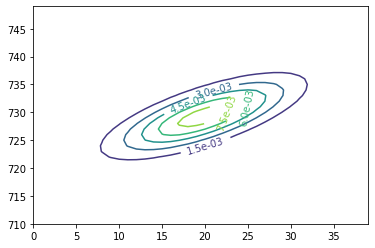

In [19]:
c = d.cov().values + np.array([[0, 20], [20, 0]])
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
cont = plt.contour(x, y, tmp.pdf(pos))  # x,y座標と，それに対応する密度を算出
cont.clabel(fmt="%1.1e")  # 投稿線に値を書き込むためのフォーマット提案
plt.show()